In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn, seed

$$
    E = -\sum_n y^{(n)}\log\hat y^{(n)} + (1 - y^{(n)})\log(1 - \hat y^{(n)})
$$


$$
    \frac{\partial E}{\partial w_i} = \sum_{n} x_i^{(n)} \left[\hat y^{(n)} - y^{(n)}\right] \ \forall i\in \{0, 1, 2\}
$$

Where,


$$
    \hat y^{(n)} = \sigma(w_0 + w_1 x_1^{(n)} + w_2 x_2^{(n)})
$$

In [200]:
seed(314)
x1 = randn(25, 2) - np.array([-0.5, -1])
x2 = randn(25, 2) - np.array([0.5, 0.5])
x = np.r_[x1, x2]
y = np.r_[np.ones((25, 1)), np.zeros((25, 1))]

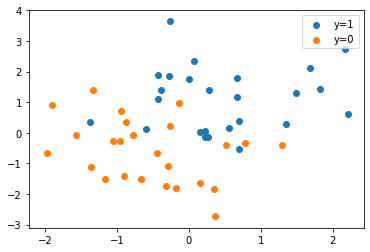

In [201]:
plt.scatter(*x1.T, label="y=1")
plt.scatter(*x2.T, label="y=0")
plt.legend()

In [202]:
seed(314)
D = np.c_[x, y]
np.random.shuffle(D)

In [203]:
x, y = D[:, :2], D[:, -1]

In [204]:
from ipywidgets import interact, FloatSlider
@interact(w0=FloatSlider(min=-1, max=1, value=0),
          w1=FloatSlider(min=-1, max=1, value=1),
          w2=FloatSlider(min=-1, max=1, value=1))
def plot_ws(w0, w1, w2):
    x11 = -2
    x21 = (-x11 * w1 + - w0) / w2
    x12 = 2
    x22 = (-x12 * w1 + - w0) / w2
    plt.scatter(*x1.T, label="y=1")
    plt.scatter(*x2.T, label="y=0")
    plt.plot([x11, x12], [x21, x22], c="black")
    plt.ylim(-2, 2)

interactive(children=(FloatSlider(value=0.0, description='w0', max=1.0, min=-1.0), FloatSlider(value=1.0, desc…

In [205]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def E(w0, w1, w2, x1, x2, y):
    z = w0 + w1 * x1 + w2 * x2
    yhat = sigmoid(z)
    return - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def grad(w0, w1, w2, x1, x2, y, i):
    if i == 1:
        xi = x1
    elif i == 2:
        xi = x2
    else: # case 0
        xi = 1
    z = w0 + w1 * x1 + w2 * x2
    yhat = sigmoid(z)
    
    return xi * (yhat - y)

Cuando tenemos la base de datos completa

In [206]:
epochs = 5
alpha = 0.3
w0, w1, w2 = 0, 1, 1
# Numero de veces por actualizar wi's
final_errs = []
for e in range(epochs):
    errs = 0
    sumw0, sumw1, sumw2 = 0, 0, 0
    for xr, yi in zip(x, y):
        x1n, x2n = xr
        z = w0 + w1 * x1n + w2 * x2n
        yhat = sigmoid(z)
        
        err = E(w0, w1, w2, x1n, x2n, yi)
        errs += err
        
        sumw0 += 1 * (yhat - yi)
        sumw1 += x1n * (yhat - yi)
        sumw2 += x2n * (yhat - yi)
    
    w0 = w0 - alpha * sumw0
    w1 = w1 - alpha * sumw1
    w2 = w2 - alpha * sumw2
        
    final_errs.append(errs)

In [207]:
final_errs

[17.766287418746785,
 15.755835512071826,
 15.693373306413811,
 15.689647314731497,
 15.68807313781658]

In [208]:
w0, w1, w2

(-0.20318170627674936, 1.716001471025708, 1.980875301414721)

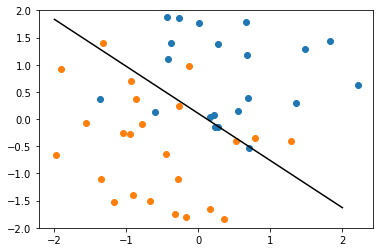

In [209]:
def plot_hyperplane(w0, w1, w2, x11=-2, x12=2, ax=None):
    ax = plt if ax is None else ax
    x21 = (-x11 * w1 + - w0) / w2
    x22 = (-x12 * w1 + - w0) / w2
    ax.scatter(*x1.T, label="y=1")
    ax.scatter(*x2.T, label="y=0")
    ax.plot([x11, x12], [x21, x22], c="black")
    plt.ylim(-2, 2)

plot_hyperplane(w0, w1, w2)

Cuando no tenemos la base de datos completa y una lista de valores

0.12257748113897647 0.7528650430716385 1.5567422647371936
0.629975960133306 0.9419230676882638 1.8527020883352399
0.8786912598083447 1.1536351697225535 2.291186545086887
-0.20318170627674936 1.716001471025708 1.980875301414721


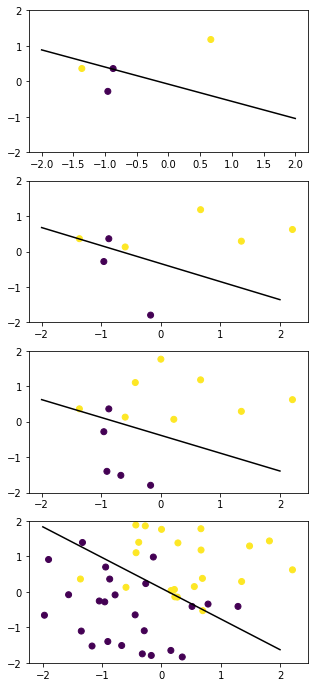

In [214]:
fig, ax = plt.subplots(4, 1, figsize=(5, 12))
ax = ax.ravel()

epochs = 5
alpha = 0.3
# Numero de veces por actualizar wi's
final_errs = []
X = [(x[:5], y[:5]), (x[:10], y[:10]), (x[:15], y[:15]), (x, y)]
for (xb, yb), axi in zip(X, ax):
    w0, w1, w2 = 0, 1, 1
    for e in range(epochs):
        errs = 0
        sumw0, sumw1, sumw2 = 0, 0, 0
        for xr, yi in zip(xb, yb):
            x1n, x2n = xr
            z = w0 + w1 * x1n + w2 * x2n
            yhat = sigmoid(z)

            err = E(w0, w1, w2, x1n, x2n, yi)
            errs += err

            sumw0 += 1 * (yhat - yi)
            sumw1 += x1n * (yhat - yi)
            sumw2 += x2n * (yhat - yi)

        w0 = w0 - alpha * sumw0
        w1 = w1 - alpha * sumw1
        w2 = w2 - alpha * sumw2
        final_errs.append(errs)
    
    x11, x12 = -2, 2
    x21 = (-x11 * w1 + - w0) / w2
    x22 = (-x12 * w1 + - w0) / w2
    print(w0, w1, w2)
    axi.plot([x11, x12], [x21, x22], c="black")
    axi.set_ylim(-2, 2)
    axi.scatter(*xb.T, c=yb)

In [226]:
ax = ax.ravel()

alpha = 0.3
w0, w1, w2 = 0, 1, 1
final_errs = []
errs = []
sumw0, sumw1, sumw2 = 0, 0, 0
for xr, yi in zip(x, y):
    x1n, x2n = xr
    z = w0 + w1 * x1n + w2 * x2n
    yhat = sigmoid(z)

    err = E(w0, w1, w2, x1n, x2n, yi)
    errs.append(err)

    sumw0 = 1 * (yhat - yi)
    sumw1 = x1n * (yhat - yi)
    sumw2 = x2n * (yhat - yi)

    w0 = w0 - alpha * sumw0
    w1 = w1 - alpha * sumw1
    w2 = w2 - alpha * sumw2

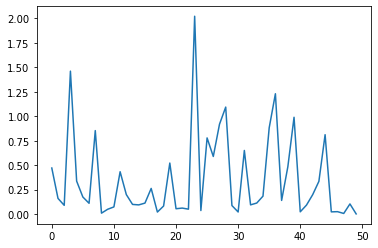

In [227]:
plt.plot(errs)

-0.30608961894343995 1.5282095239545292 1.4074448845524452


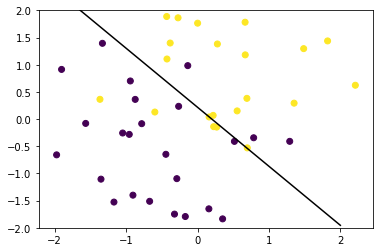

In [228]:
x11, x12 = -2, 2
x21 = (-x11 * w1 + - w0) / w2
x22 = (-x12 * w1 + - w0) / w2
print(w0, w1, w2)
plt.plot([x11, x12], [x21, x22], c="black")
plt.ylim(-2, 2)
plt.scatter(*x.T, c=yb)